In [1]:
### PREAMBLE
# Graph and network processing
# roadNet-PA_graph.gif

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [9]:
nodes = {"A", "B", "C", "D"}
edges = {("A","B"), ("B","C"), ("C","A"), ("C","D")}

{'D', 'C', 'B', 'A'}


### Adjacency list



In [4]:
nodes = ["A", "B", "C", "D"]
print(nodes)

['A', 'B', 'C', 'D']


In [5]:
nodes_dict = {"A":0, "B":1, "C":2, "D":3}
nodes_dict = {k:i for i,k in enumerate(nodes)}  # same as the above, done programmatically
print(nodes_dict)

{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [ ]:
adj_list = [[1], [2], [0,3], []]

### Adjacency dictionary



In [12]:
adj_dict = {"A": {"B":1.0}, "B":{"C":1.0}, "C":{"A":1.0, "D":1.0}, "D":{}}

### Adjacency matrix



In [13]:
nodes = ["A", "B", "C", "D"]
nodes_dict = {k:i for i,k in enumerate(nodes)}

In [ ]:
values = [1,1,1,1]
row_indices = [1, 2, 0, 3]
col_indices = [0, 1, 2, 4, 4]

## Graph algorithms



In [64]:
import numpy as np

A = np.array([[0,0,1,0], [1,0,0,0], [0,1,0,0], [0,0,1,0]])
d = 0.1
T = 1000

P = A.copy()
P[:, P.sum(0) == 0] = 1
P = P / (P.sum(0)+1e-10)
Phat = (1-d)*P + d/A.shape[0]*np.ones(A.shape)
x = np.ones(A.shape[0])/A.shape[0]
for _ in range(T):
    x = Phat @ x
    x = x/x.sum()
print(x)

[ 0.21260745  0.26418338  0.31060172  0.21260745]


## The NetworkX graph library

In [3]:
import networkx as nx
G_undirected = nx.Graph()
G_directed = nx.DiGraph()

In [25]:
G = nx.Graph()
G.add_node("A")
G.add_nodes_from(["B","C"])
print(G.nodes())

['A', 'B', 'C']


In [27]:
G.remove_nodes_from(["A", "C"])
print(G.nodes())
G.add_nodes_from(["A", "C"])
G.remove_node("B")
print(G.nodes())

['B']
['A', 'C']


In [29]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


In [30]:
G.remove_edge("A","B") 
print(G.edges())

[('B', 'C'), ('C', 'A'), ('C', 'D')]


In [31]:
G.remove_edges_from([("A","B"), ("B","C")])
print(G.edges(), weight)

[('C', 'A'), ('C', 'D')]


In [54]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
G.remove_node("A")
print(G.edges())

[('B', 'C'), ('C', 'D')]


In [51]:
G = nx.DiGraph()
G.add_edge("A","B", weight=1.0)
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")], weight="4.0")

In [57]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(G["C"])

{'A': {}, 'D': {}}


In [61]:
G["A"]["B"]["color"] = "red"

In [62]:
G["A"]["B"]["weight"] = 1.0
print(G["A"]["B"])

{'weight': 1.0, 'color': 'red'}


In [64]:
G.node["A"]["color"] = "blue"
print(G.node["A"])

{'color': 'blue'}


In [66]:
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'D')]


In [67]:
print(G.nodes(data=True))
print(G.edges(data=True))

[('A', {'color': 'blue'}), ('B', {}), ('C', {}), ('D', {})]
[('A', 'B', {'weight': 1.0, 'color': 'red'}), ('B', 'C', {}), ('C', 'A', {}), ('C', 'D', {})]


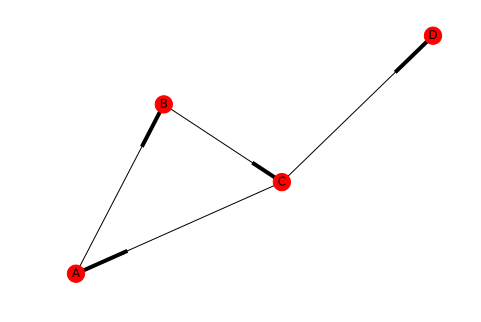

In [9]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.draw(G, with_labels=True)

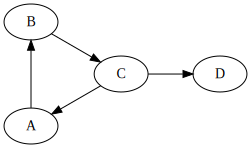

In [30]:
from IPython.display import SVG
A = nx.nx_agraph.to_agraph(G)
A.draw("out.svg", prog="circo")
SVG("out.svg")

In [80]:
G = nx.Graph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
print(nx.shortest_path_length(G, source="A"))
print(nx.shortest_path(G, source="A"))

{'A': 0, 'B': 1, 'C': 1, 'D': 2}
{'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'C', 'D']}


In [82]:
G = nx.DiGraph()
G.add_edges_from([("A","B"), ("B","C"), ("C","A"), ("C","D")])
nx.pagerank(G, alpha=0.9)

{'A': 0.2126075277037968,
 'B': 0.2641838185655828,
 'C': 0.31060112602682377,
 'D': 0.2126075277037968}

In [94]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (4,5), (4,6), (5,6), 
                  (9,10), (9,11), (10,11), (12,13), (12,14), (13,14),
                  (3,7), (6,7), (7,8), (8,9), (8,12)])
communities = nx.community.girvan_newman(G)
list(communities)

[({1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6, 7}, {9, 10, 11}, {8, 12, 13, 14}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {8, 12, 13, 14}, {7}),
 ({1, 2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2, 3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4, 5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5, 6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9, 10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10, 11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12, 13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13, 14}, {7}, {8}),
 ({1}, {2}, {3}, {4}, {5}, {6}, {9}, {10}, {11}, {12}, {13}, {14}, {7}, {8})]